In [1]:
NAME = "Leonardo Passos Fida"
COLLABORATORS = ""

# k Nearest neighbors classification project: flower dataset

In [2]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

With the imports done, we need to download the data from sklearn. We can create a DataFrame called "df_merged", in order to combine the iris dataset with the target column. Moreover, we can create a new column called "class", which shows the type of flower we are dealing with (setosa, versicolor or virginica):

In [3]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])
df_merged=df_data.join(df_target)
df_merged['class']=df_merged['target'].apply(lambda x: "Iris-setosa" if x==0 else ("Iris-versicolor" if x==1 else "Iris-virginica"))
df_merged.head()

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa


In order to understand the data, we can use the .info() and .describe() methods on the DataFrame:

In [4]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
 5   class         150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


From the table above, we can observe that there are no null values in the dataset. The "target" variable is instrinsically related to the "class" variable, since there are only 3 classes of flowers in the DataFrame (setosa, versicolor and virginica). Some summary statistics of the data can be found below:

In [5]:
df_merged.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Petal length and sepal length are the parameters which show the most amount of disperson in the dataset. Additionally, the maximum and minimum values for all four numerical categories of the flowers in the dataset are considerably close to each other and within the same order of magnitude. We can also determine the amount of observations for each class of flower:

In [6]:
df_merged['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

All flowers have the same amount of observations. With the above steps completed, we can prepare scatter plots which show properties of each class of flower in the dataset. First, plotting sepal_width versus sepal_length:

<Figure size 864x720 with 0 Axes>

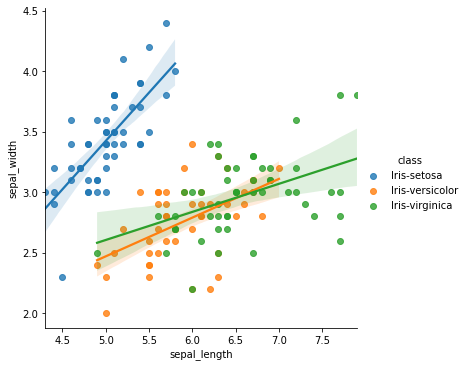

In [7]:
plt.figure(figsize=(12,10));
sns.lmplot(x='sepal_length',y='sepal_width',data=df_merged,hue='class');

We can clearly see that the "setosa" flower class shows the highest values of sepal width. Additionally, the values of sepal width and sepal length for the classes "versicolor" and "virginica" are very close to each other and almost overlap (lines of best fit for these two classes show a low difference in their slopes).

And now, plotting petal_width versus petal_length:

<Figure size 864x720 with 0 Axes>

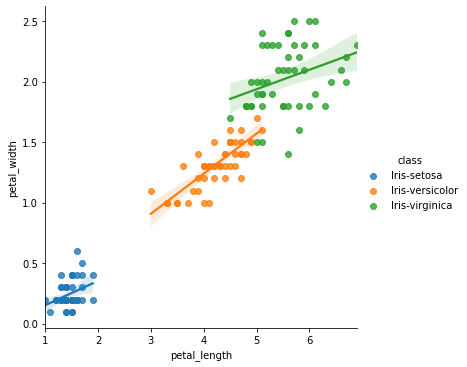

In [8]:
plt.figure(figsize=(12,10));
sns.lmplot(x='petal_length',y='petal_width',data=df_merged,hue='class');

By observing the graph above, we can conclude that there is a significant difference between the flower classes regarding their petal width and length. The class "setosa" shows the lowest values of petal width and length, whereas the class "virginica" shows the highest values. The class "versicolor" lies in an intermediate position between the other two classes.

Nevertheless, since the values of maximum and minimum for all four categories (petal length, petal width, sepal length and sepal width) in the dataset are not very far away from each other in terms of their scale and order of magnitude, feature scaling before the training and testing is not necessary.

At this step, we must prepare the data for classification. First, we need to prepare the feature variables X and the response y for the fit:

In [9]:
X = data
y = target

Splitting the data into train and test (cross-validation):

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Now, we can instantiate the K Nearest Neighbours model. As a starting point, we can consider the value of K of 1:

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

Then, we can run the classifier on the training set:

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Finally, we can run prediction on X from the test part:

In [13]:
pred = knn.predict(X_test)

The accuracy score of the prediction can be determined by comparing the predicted iris classes and the Y values from the test. The "accuracy_score" function from sklearn can be used:

In [14]:
accuracy_score(pred,y_test)

0.9777777777777777

Comparing the predicted classes and the Y values from the test, we can now count the number of correct predictions that were right and the number that were wrong:

In [15]:
true=0
false=0
for i in range(len(y_test)):
    if pred[i]==y_test[i]:
        true=true+1
    else:
        false=false+1
print("Number of correct predictions:",true,"Number of wrong predictions:",false)

Number of correct predictions: 44 Number of wrong predictions: 1


We can clearly see that the accuracy is high, since the number of incorrect predictions is considerably low. We can also display the confusion matrix and the classification report of the prediction:

<Figure size 2000x1500 with 0 Axes>

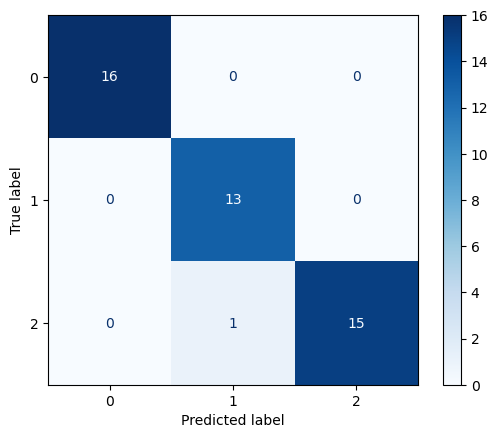

In [16]:
with plt.style.context("default"):
    fig=plt.figure(figsize=(20,15));
    ax=plot_confusion_matrix(knn,X_test,y_test,values_format="",cmap="Blues");

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



As seen above, the accuracy of the classification model is significant.

At this step, we can vary the value of K in order to observe how the accuracy changes. The values of K tested are:

In [18]:
kvalues=[1,3,5,7,10,20,30,40,50]

For each value of K, we will run 10 random train/test splits:

In [19]:
ntests=10

The procedure can be done with a for loop:

In [20]:
error=np.zeros((len(kvalues),ntests))
accuracy=np.zeros((len(kvalues),ntests))
pred=np.zeros((len(kvalues),ntests))
true=np.zeros((len(kvalues),ntests))
false=np.zeros((len(kvalues),ntests))
cont_k=0
for i in kvalues:
    for cont in range(0,ntests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error[cont_k,cont]=np.mean(pred_i != y_test)
        accuracy[cont_k,cont]=accuracy_score(pred_i,y_test)
        for j in range(len(y_test)):
            if pred_i[j]==y_test[j]:
                true[cont_k,cont]+=1
            else:
                false[cont_k,cont]+=1
    cont_k+=1

In the code above, "error" means the mean error rate of each test, "accuracy" refers to the accuracy score of each test, "true" means the number of correct predictions and, obviously, "false" refers to the number of incorrect predictions.

We can now calculate the average of accuracy score, error, correct and incorrect predictions for each value of K:

In [21]:
acc_mean=np.zeros(len(kvalues))
error_mean=np.zeros(len(kvalues))
true_mean=np.zeros(len(kvalues))
false_mean=np.zeros(len(kvalues))
for cont_k in range(0,len(kvalues)):
    for cont in range(0,ntests):
        acc_mean[cont_k]=acc_mean[cont_k]+accuracy[cont_k,cont]
        error_mean[cont_k]=error_mean[cont_k]+error[cont_k,cont]
        true_mean[cont_k]=true_mean[cont_k]+true[cont_k,cont]
        false_mean[cont_k]=false_mean[cont_k]+false[cont_k,cont]
    acc_mean[cont_k]=acc_mean[cont_k]/ntests
    error_mean[cont_k]=error_mean[cont_k]/ntests
    true_mean[cont_k]=true_mean[cont_k]/ntests
    false_mean[cont_k]=false_mean[cont_k]/ntests
acc_mean

array([0.94444444, 0.96222222, 0.96444444, 0.96888889, 0.96222222,
       0.94888889, 0.93777778, 0.92444444, 0.89777778])

The output of the cell above refers to the average accuracy score for each value of K. The average number of correct predictions is displayed below:

In [22]:
true_mean

array([42.5, 43.3, 43.4, 43.6, 43.3, 42.7, 42.2, 41.6, 40.4])

We can organize all of the above information in a table. First, we can create a dictionary called "results":

In [23]:
results={'K value':kvalues,'Mean Accuracy':acc_mean,'Mean Error':error_mean,'Mean Correct Predictions':true_mean}

Then, we can create the table "summary_results":

In [24]:
summary_results=pd.DataFrame(results)
summary_results=summary_results.set_index('K value')

In [25]:
summary_results

,Mean Accuracy,Mean Error,Mean Correct Predictions
K value,,,
1,0.944444,0.055556,42.5
3,0.962222,0.037778,43.3
5,0.964444,0.035556,43.4
7,0.968889,0.031111,43.6
10,0.962222,0.037778,43.3
20,0.948889,0.051111,42.7
30,0.937778,0.062222,42.2
40,0.924444,0.075556,41.6
50,0.897778,0.102222,40.4


Finally, we can plot the accuracy score for different values of K. The resulting graph can be observed below:

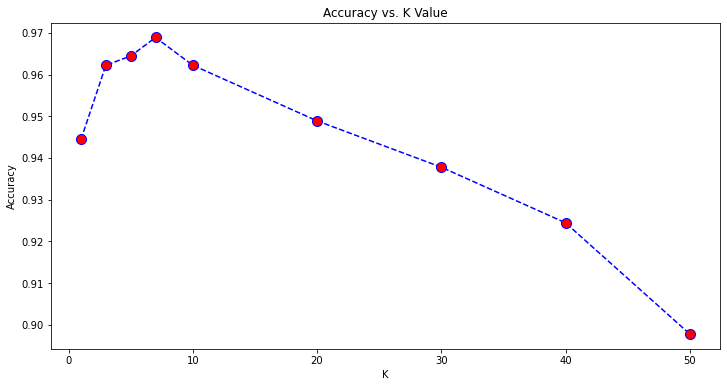

In [26]:
plt.figure(figsize=(12,6));
plt.plot(kvalues,acc_mean,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10);
plt.title('Accuracy vs. K Value');
plt.xlabel('K');
plt.ylabel('Accuracy');

We can clearly see the following general trend: as the value of K increases, the accuracy score decreases. Generally, larger values of K reduce the effect of noise in the classification, but make boundaries between classes less distinct. In other words, when K becomes larger, since it has to consider more neighbours, its model becomes more complex.

Plotting the mean error versus the K values:

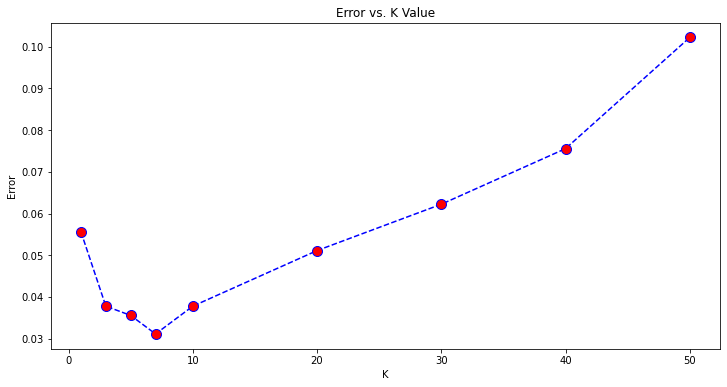

In [27]:
plt.figure(figsize=(12,6));
plt.plot(kvalues,error_mean,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10);
plt.title('Error vs. K Value');
plt.xlabel('K');
plt.ylabel('Error');

The same behaviour can be seen in the graph above. As the K value increases, the mean error also increases, due to the fact that the accuracy score decreases.

The average number of correct predictions for each value of K is plotted below:

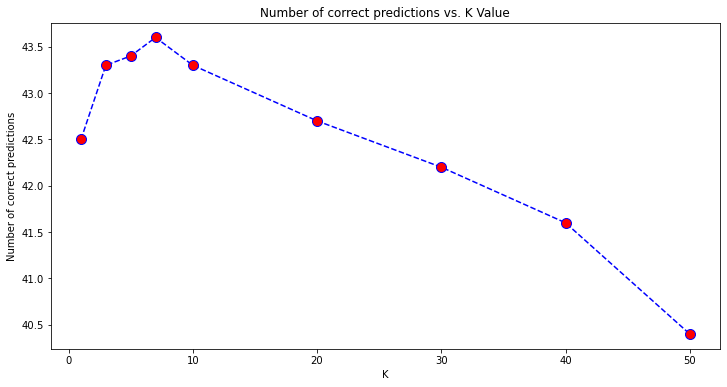

In [28]:
plt.figure(figsize=(12,6));
plt.plot(kvalues,true_mean,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10);
plt.title('Number of correct predictions vs. K Value');
plt.xlabel('K');
plt.ylabel('Number of correct predictions');

As it is expected, since when the K value increases, the accuracy score decreases, the number of correct predictions will also decrease. This trend can be seen in the graph above.